In [1]:
using Pkg

In [2]:
Pkg.activate(".");

 Activating environment at `~/PycharmProjects/JuliaEnv/Project.toml`


In [3]:
# Pkg.instantiate()

In [3]:
using DataFrames, CSV, Statistics, Plots;

In [4]:
function make_file_path(file_path::String)
    all_files = filter(x -> occursin(r".log$", x), readdir(file_path, join=true))
end

make_file_path (generic function with 1 method)

In [10]:
function read_all_log(file_path::String)
    df_list = []
    files = make_file_path(file_path)
    for (i, file) in enumerate(files)
        if i // 5 == 0
            println("Parsing $(i)/$(length(files))")
        end
        temp_df = CSV.File(file, header=true) |> DataFrame
        push!(df_list, temp_df)
    end
    vcat(df_list...)
end

read_all_log (generic function with 1 method)

In [11]:
main_df = read_all_log("./data");

In [12]:
first(main_df)

DataFrameRow
 Row │ worker_id  concurrency_group  time_elapsed  request_body_length  server ⋯
     │ Int64      Int64              Float64       Int64                String ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │        48                100          0.34                   97  GinTon ⋯
                                                                1 column omitted

In [13]:
names(main_df)

5-element Array{String,1}:
 "worker_id"
 "concurrency_group"
 "time_elapsed"
 "request_body_length"
 "server_name"

In [14]:
agg_df = combine(
    groupby(main_df, [:server_name , :concurrency_group]), 
    :time_elapsed => mean
)
sort!(agg_df, [:server_name , :concurrency_group]);

In [15]:
function filter_df_by_server(df, name)
    return filter(:server_name => ==(name), df)
end

filter_df_by_server (generic function with 1 method)

In [16]:
names(agg_df)

3-element Array{String,1}:
 "server_name"
 "concurrency_group"
 "time_elapsed_mean"

In [14]:
NAMES = ["GinTonic", "HTTP.jl", "Flask"];

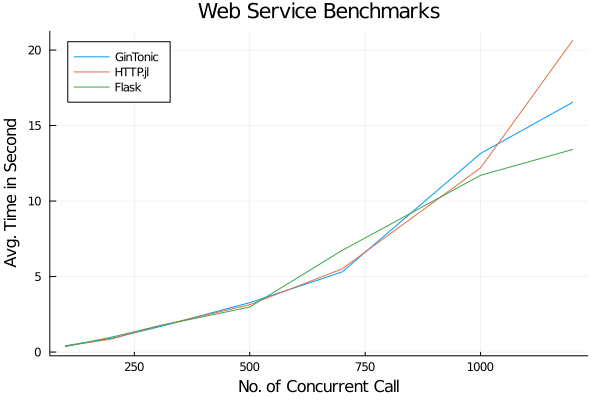

In [19]:
let
    plt = plot(
        xlabel = "No. of Concurrent Call", 
        ylabel= "Avg. Time in Second", 
        lw = 3, 
        title = "Web Service Benchmarks", 
        legend=:topleft,
    )
    for name in NAMES
        filtered_df = filter_df_by_server(agg_df, name)
        plt = plot!(
            filtered_df.concurrency_group, 
            filtered_df.time_elapsed_mean, 
            fmt = :png,
            label = name
        )
    end
    savefig("./img/benchmark.png")
    display(plt)
end

# TEMP

In [18]:
# # Remove actual web address from the data.
# agg_df.server_id = map(x -> match(r"-go|-jl|-py", x).match, agg_df.endpoint);

# function rename_server(server_id)
#     if server_id == "-go"
#         return "GinTonic"
#     elseif server_id == "-jl"
#         return "HTTP.jl"
#     else server_id == "-py"
#         return "Flask"
#     end
# end

# agg_df.server_name = map(x -> rename_server(x), agg_df.server_id);

In [19]:
names(main_df)

7-element Array{String,1}:
 "worker_id"
 "concurrency_group"
 "time_elapsed"
 "request_body_length"
 "endpoint"
 "server_id"
 "server_name"

In [24]:
# function remove_server_address(file_path::String)
#     files = make_file_path(file_path)
#     header_names = [:worker_id, :concurrency_group, :time_elapsed, :request_body_length, :endpoint]
#     for (i, file) in enumerate(files)
#         if i // 5 == 0
#             println("Parsing $(i)/$(length(files))")
#         end
#         temp_df = CSV.File(file, header=header_names) |> DataFrame
#         temp_df.server_id = map(x -> match(r"-go|-jl|-py", x).match, temp_df.endpoint)
#         temp_df.server_name = map(x -> rename_server(x), temp_df.server_id);
#         select!(temp_df,  Not([:endpoint, :server_id]))
#         CSV.write(file, temp_df)
#     end
# end

remove_server_address (generic function with 1 method)

In [25]:
# remove_server_address("./data")